In [ ]:
!pip install matplotlib==3.2.2
!pip install tensorflow==2.12.0

In [ ]:
# import necessary python packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import json
import pandas as pd
import os
import copy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from colorsys import rgb_to_hls
import seaborn as sns
import matplotlib.colors as mcolors


# Check Versions
print('Numpy: ' + np.__version__)
print('Matplotlib: ' + matplotlib.__version__) # must be 3.2.2
print('Tensorflow: ' + tf.__version__)
#print('Keras: ' + keras.__version__) # comment out if using tf 2.13.0

Numpy: 1.23.5
Matplotlib: 3.2.2
Tensorflow: 2.12.0


In [ ]:
# Import the required library
!pip install openpyxl
import pandas as pd

# Define the path to your file in Colab
path = '/content/'
file_name = 'CANNS_HEART_BI05.xlsx'

# Load the Excel file
dfs = pd.read_excel(path + file_name, sheet_name='Sheet1')

# Check the first few rows of the data
print(dfs.head())

  Sommer2015 Sommer2015.1 Sommer2015.2 Sommer2015.3  Unnamed: 4 Sommer2015.4  \
0      fs_05        fs_05        fn_05        fn_05         NaN        sf_05   
1      gamma            P        gamma            P         NaN        gamma   
2        [-]        [kPa}          [-]        [kPa]         NaN          [-]   
3          0            0            0            0         NaN            0   
4     0.0495        0.066        0.049        0.066         NaN       0.0504   

  Sommer2015.5 Sommer2015.6 Sommer2015.7  Unnamed: 9  ... Unnamed: 39  \
0        sf_05        sn_05        sn_05         NaN  ...         NaN   
1            P        gamma            P         NaN  ...         NaN   
2        [kPa}          [-]        [kPa]         NaN  ...         NaN   
3            0            0            0         NaN  ...         NaN   
4       0.0711       0.0504       0.0711         NaN  ...         NaN   

     0.5 1 Unnamed: 41 Unnamed: 42  Unnamed: 43 Unnamed: 44   0.75 1  \
0       

In [ ]:
# Load data for different testing modes
def getStressStrain(Region):
    if Region =='heart':

        i=15
        #biaxial test 1:1
        P_1010_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_1010_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_1010_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_1010_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values

        i=i+5
        #biaxial test 1:025
        P_1002_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_1002_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_1002_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_1002_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values

        i=i+5
        #biaxial test 1:05
        P_1005_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_1005_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_1005_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_1005_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values

        i=i+5
        #biaxial test 1:075
        P_1007_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_1007_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_1007_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_1007_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values

        i=i+5
        # #biaxial test 025:1
        P_0210_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_0210_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_0210_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_0210_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values


        i=i+5
        # #biaxial test 05:1
        P_0510_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_0510_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_0510_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_0510_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values


        i=i+5
        # #biaxial test 075:1
        P_0710_f = dfs.iloc[3:,i+1].dropna().astype(np.float64).values
        stretch_0710_f = dfs.iloc[3:,i].dropna().astype(np.float64).values

        P_0710_n = dfs.iloc[3:,i+3].dropna().astype(np.float64).values
        stretch_0710_n = dfs.iloc[3:,i+2].dropna().astype(np.float64).values


    return (P_1010_f, stretch_1010_f, P_1010_n,stretch_1010_n,
    P_1002_f, stretch_1002_f, P_1002_n,stretch_1002_n,
    P_1005_f, stretch_1005_f, P_1005_n,stretch_1005_n,
    P_1007_f, stretch_1007_f, P_1007_n,stretch_1007_n,
    P_0210_f, stretch_0210_f, P_0210_n,stretch_0210_n,
    P_0510_f, stretch_0510_f, P_0510_n,stretch_0510_n,
    P_0710_f, stretch_0710_f, P_0710_n,stretch_0710_n)


# Define different loading protocols
def traindata(modelFit_mode):
    if modelFit_mode == "biaxial_all":
        model_given = model_bi_all
        input_train = [[stretch_1010_f, stretch_1010_n],[stretch_1002_f, stretch_1002_n],[stretch_1005_f, stretch_1005_n],[stretch_1007_f, stretch_1007_n],[stretch_0210_f, stretch_0210_n],[stretch_0510_f, stretch_0510_n],[stretch_0710_f, stretch_0710_n]] #separate models for biaxial data so input and output need 2 arrays
        output_train = [[P_1010_f, P_1010_n],[P_1002_f, P_1002_n],[P_1005_f, P_1005_n],[P_1007_f, P_1007_n],[P_0210_f, P_0210_n],[P_0510_f, P_0510_n],[P_0710_f, P_0710_n]]

        sample_weights_1010_f = np.array([1.0] * stretch_1010_f.shape[0])
        sample_weights_1010_n = np.array([1.0] * stretch_1010_n.shape[0])

        sample_weights_1002_f = np.array([1.0] * stretch_1002_f.shape[0])
        sample_weights_1002_n = np.array([1.0] * stretch_1002_n.shape[0])

        sample_weights_1005_f = np.array([1.0] * stretch_1005_f.shape[0])
        sample_weights_1005_n = np.array([1.0] * stretch_1005_n.shape[0])

        sample_weights_1007_f = np.array([1.0] * stretch_1007_f.shape[0])
        sample_weights_1007_n = np.array([1.0] * stretch_1007_n.shape[0])

        sample_weights_0210_f = np.array([1.0] * stretch_0210_f.shape[0])
        sample_weights_0210_n = np.array([1.0] * stretch_0210_n.shape[0])

        sample_weights_0510_f = np.array([1.0] * stretch_0510_f.shape[0])
        sample_weights_0510_n = np.array([1.0] * stretch_0510_n.shape[0])

        sample_weights_0710_f = np.array([1.0] * stretch_0710_f.shape[0])
        sample_weights_0710_n = np.array([1.0] * stretch_0710_n.shape[0])


        sample_weights = [[sample_weights_1010_f],[sample_weights_1010_n],[sample_weights_1002_f],[sample_weights_1002_n],[sample_weights_1005_f],[sample_weights_1005_n],[sample_weights_1007_f],[sample_weights_1007_n],[sample_weights_0210_f],[sample_weights_0210_n],[sample_weights_0510_f],[sample_weights_0510_n],[sample_weights_0710_f],[sample_weights_0710_n]]



    return model_given, input_train, output_train, sample_weights


Region_test = 'heart'
(P_1010_f, stretch_1010_f, P_1010_n,stretch_1010_n,
P_1002_f, stretch_1002_f, P_1002_n,stretch_1002_n,
P_1005_f, stretch_1005_f, P_1005_n,stretch_1005_n,
P_1007_f, stretch_1007_f, P_1007_n,stretch_1007_n,
P_0210_f, stretch_0210_f, P_0210_n,stretch_0210_n,
P_0510_f, stretch_0510_f, P_0510_n,stretch_0510_n,
P_0710_f, stretch_0710_f, P_0710_n,stretch_0710_n) = getStressStrain(Region_test)


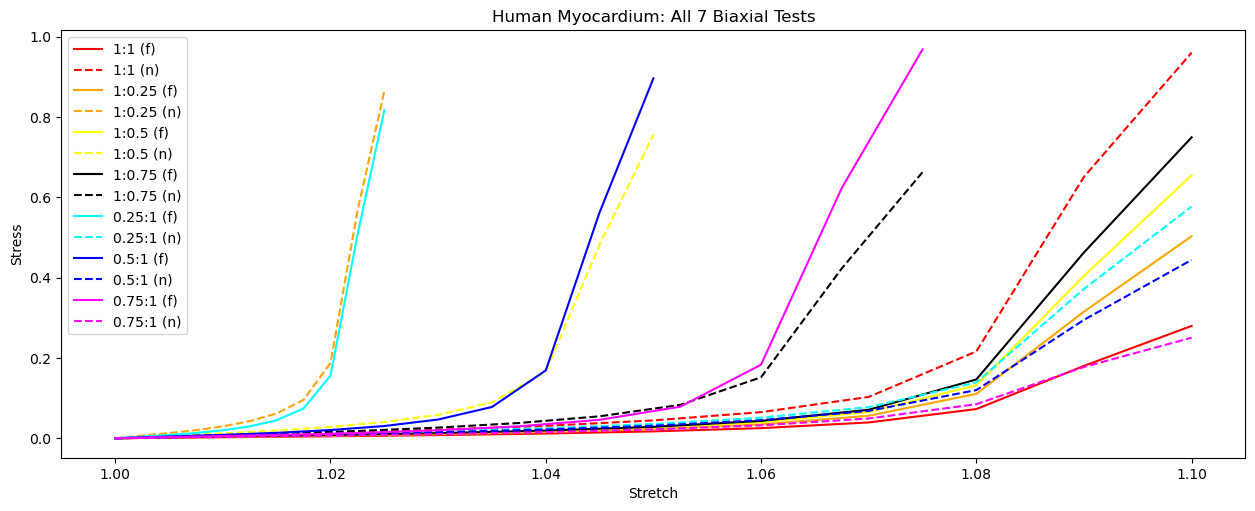

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1100/72, 400/72))

# 1) Biaxial 1:1
plt.plot(stretch_1010_f, P_1010_f, color='red',    linestyle='-',  label='1:1 (f)')
plt.plot(stretch_1010_n, P_1010_n, color='red',    linestyle='--', label='1:1 (n)')

# 2) Biaxial 1:0.25
plt.plot(stretch_1002_f, P_1002_f, color='orange', linestyle='-',  label='1:0.25 (f)')
plt.plot(stretch_1002_n, P_1002_n, color='orange', linestyle='--', label='1:0.25 (n)')

# 3) Biaxial 1:0.5
plt.plot(stretch_1005_f, P_1005_f, color='yellow', linestyle='-',  label='1:0.5 (f)')
plt.plot(stretch_1005_n, P_1005_n, color='yellow', linestyle='--', label='1:0.5 (n)')

# 4) Biaxial 1:0.75
plt.plot(stretch_1007_f, P_1007_f, color='black',  linestyle='-',  label='1:0.75 (f)')
plt.plot(stretch_1007_n, P_1007_n, color='black',  linestyle='--', label='1:0.75 (n)')

# 5) Biaxial 0.25:1
plt.plot(stretch_0210_f, P_0210_f, color='cyan',   linestyle='-',  label='0.25:1 (f)')
plt.plot(stretch_0210_n, P_0210_n, color='cyan',   linestyle='--', label='0.25:1 (n)')

# 6) Biaxial 0.5:1
plt.plot(stretch_0510_f, P_0510_f, color='blue',   linestyle='-',  label='0.5:1 (f)')
plt.plot(stretch_0510_n, P_0510_n, color='blue',   linestyle='--', label='0.5:1 (n)')

# 7) Biaxial 0.75:1
plt.plot(stretch_0710_f, P_0710_f, color='magenta',linestyle='-',  label='0.75:1 (f)')
plt.plot(stretch_0710_n, P_0710_n, color='magenta',linestyle='--', label='0.75:1 (n)')

plt.xlabel('Stretch')
plt.ylabel('Stress')
plt.title('Human Myocardium: All 7 Biaxial Tests')
plt.legend(loc='best')
plt.show()

In [ ]:
def regularize(reg, pen):
    if reg == 'L2':
        return keras.regularizers.l2(pen)
    if reg == 'L1':
        return keras.regularizers.l1(pen)

In [ ]:
initializer_exp = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1, seed=np.random.randint(0,10000))  # use random integer as seed
initializer_1 = 'glorot_normal'

# Self defined activation functions for exp term
def activation_Exp(x):
    return 1.0 * (tf.math.exp(x) - 1.0)

# Self defined activation functions for ln term (if needed later)
def activation_ln(x):
    return -1.0 * tf.math.log(1.0 - x)

# Define a network block that processes a single invariant.
# The flag is_isotropic indicates whether the invariant is isotropic (True) or anisotropic (False).
def SingleInvNet(I_ref, idi, reg, pen, is_isotropic=True):
    if is_isotropic:
        # For isotropic invariants: generate both linear (raw) and quadratic (square) features.
        term1 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_1,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=None,
            name='w' + str(1 + idi) + '1'
        )(I_ref)  # linear branch: no activation

        term2 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_exp,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=activation_Exp,
            name='w' + str(2 + idi) + '1'
        )(I_ref)  # linear branch: exp activation

        # Quadratic branch
        term3 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_1,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=None,
            name='w' + str(3 + idi) + '1'
        )(tf.math.square(I_ref))  # quadratic: no activation

        term4 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_exp,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=activation_Exp,
            name='w' + str(4 + idi) + '1'
        )(tf.math.square(I_ref))  # quadratic: exp activation

        collect_out = tf.keras.layers.concatenate([term1, term2, term3, term4], axis=1)

    else:
        # For anisotropic invariants: only process the quadratic branch.
        term1 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_1,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=None,
            name='w' + str(1 + idi) + '1'
        )(tf.math.square(I_ref))  # quadratic branch only

        term2 = keras.layers.Dense(
            1,
            kernel_initializer=initializer_exp,
            kernel_constraint=keras.constraints.NonNeg(),
            kernel_regularizer=regularize(reg, pen),
            use_bias=False,
            activation=activation_Exp,
            name='w' + str(2 + idi) + '1'
        )(tf.math.square(I_ref))  # quadratic branch only

        collect_out = tf.keras.layers.concatenate([term1, term2], axis=1)

    return collect_out


In [ ]:
def StrainEnergyCANN_invariant(reg, pen):
    # Inputs defined
    I1_in = tf.keras.Input(shape=(1,), name='I1')
    I2_in = tf.keras.Input(shape=(1,), name='I2')
    I411_in = tf.keras.Input(shape=(1,), name='I411')
    I422_in = tf.keras.Input(shape=(1,), name='I422')
    I511_in = tf.keras.Input(shape=(1,), name='I511')
    I522_in = tf.keras.Input(shape=(1,), name='I522')

    # Put invariants in the reference configuration
    I1_ref = keras.layers.Lambda(lambda x: (x - 3.0))(I1_in)
    I2_ref = keras.layers.Lambda(lambda x: (x - 3.0))(I2_in)
    I411_ref = keras.layers.Lambda(lambda x: (x - 1.0))(I411_in)
    I422_ref = keras.layers.Lambda(lambda x: (x - 1.0))(I422_in)
    I511_ref = keras.layers.Lambda(lambda x: (x - 1.0))(I511_in)
    I522_ref = keras.layers.Lambda(lambda x: (x - 1.0))(I522_in)

    # Process isotropic invariants with both linear and quadratic branches.
    I1_out = SingleInvNet(I1_ref, 0, reg, pen, is_isotropic=True)
    terms_iso = I1_out.get_shape().as_list()[1]  # should be 4

    I2_out = SingleInvNet(I2_ref, terms_iso, reg, pen, is_isotropic=True)

    # Process anisotropic invariants with only the quadratic branch.
    I411_out = SingleInvNet(I411_ref, 2 * terms_iso, reg, pen, is_isotropic=False)
    I422_out = SingleInvNet(I422_ref, 3 * terms_iso, reg, pen, is_isotropic=False)
    I511_out = SingleInvNet(I511_ref, 4 * terms_iso, reg, pen, is_isotropic=False)
    I522_out = SingleInvNet(I522_ref, 5 * terms_iso, reg, pen, is_isotropic=False)

    # Concatenate the outputs from all invariants.
    ALL_I_out = tf.keras.layers.concatenate([I1_out, I2_out, I411_out, I422_out, I511_out, I522_out], axis=1)

    # Second layer: combine the concatenated features to produce a single output.
    W_ANN = keras.layers.Dense(
        1,
        kernel_initializer='glorot_normal',
        kernel_constraint=keras.constraints.NonNeg(),
        kernel_regularizer=regularize(reg, pen),
        use_bias=False,
        activation=None,
        name='wx2'
    )(ALL_I_out)

    # Create the model using the six inputs and the single output.
    Psi_model = keras.models.Model(inputs=[I1_in, I2_in, I411_in, I422_in, I511_in, I522_in],
                                   outputs=[W_ANN],
                                   name='Psi')

    # Return the model and the total number of terms.
    # Isotropic invariants contribute 4 terms each; anisotropic invariants contribute 2 terms each.
    total_terms = 4 + 4 + 2 + 2 + 2 + 2  # = 16 terms
    return Psi_model, total_terms

In [ ]:
def Stress_cal_f(inputs):
    (dWI1, dWI2, dWI4_f, stretch_f, stretch_n) = inputs
    one = tf.constant(1.0, dtype='float32')
    two = tf.constant(2.0, dtype='float32')
    # For constant thickness, set stretch_s to 1
    stretch_s = one  # instead of 1/(stretch_f*stretch_n)
    stress_f = two * (dWI1 * (stretch_f*stretch_f - stretch_s*stretch_s) +
                      dWI2 * stretch_n*stretch_n * (stretch_f*stretch_f - stretch_s*stretch_s) +
                      dWI4_f * stretch_f*stretch_f)
    return stress_f

def Stress_cal_n(inputs):
    (dWI1, dWI2, dWI4_n, stretch_f, stretch_n) = inputs
    one = tf.constant(1.0, dtype='float32')
    two = tf.constant(2.0, dtype='float32')
    stretch_s = one  # assume constant thickness
    stress_n = two * (dWI1 * (stretch_n*stretch_n - stretch_s*stretch_s) +
                      dWI2 * stretch_f*stretch_f * (stretch_n*stretch_n - stretch_s*stretch_s) +
                      dWI4_n * stretch_n*stretch_n)
    return stress_n


In [ ]:
# Simple shear stress
#def stress_cal_ss_ortho(inputs):
#    (dPsidI1, dPsidI2, dPsidI4,dPsidI8, gamma) = inputs
#    two = tf.constant(2.0,dtype='float32')
#    stress = two*gamma * (dPsidI1  + dPsidI2 + dPsidI4) + dPsidI8
#    return stress

In [ ]:
# Gradient function
## automatic gradients
def myGradient(a, b):
    der = tf.gradients(a, b, unconnected_gradients='zero')
    return der[0]

def modelArchitecture(Psi_model):
    #print(modelFit_mode)

    Stretch_f_1 = keras.layers.Input(shape=(1,), name='Stretch_f_1')
    Stretch_n_1 = keras.layers.Input(shape=(1,), name='Stretch_n_1')

    Stretch_f_2 = keras.layers.Input(shape=(1,), name='Stretch_f_2')
    Stretch_n_2 = keras.layers.Input(shape=(1,), name='Stretch_n_2')

    Stretch_f_3 = keras.layers.Input(shape=(1,), name='Stretch_f_3')
    Stretch_n_3 = keras.layers.Input(shape=(1,), name='Stretch_n_3')

    Stretch_f_4 = keras.layers.Input(shape=(1,), name='Stretch_f_4')
    Stretch_n_4 = keras.layers.Input(shape=(1,), name='Stretch_n_4')

    Stretch_f_5 = keras.layers.Input(shape=(1,), name='Stretch_f_5')
    Stretch_n_5 = keras.layers.Input(shape=(1,), name='Stretch_n_5')

    Stretch_f_6 = keras.layers.Input(shape=(1,), name='Stretch_f_6')
    Stretch_n_6 = keras.layers.Input(shape=(1,), name='Stretch_n_6')

    Stretch_f_7 = keras.layers.Input(shape=(1,), name='Stretch_f_7')
    Stretch_n_7 = keras.layers.Input(shape=(1,), name='Stretch_n_7')

    #models for all possible shear modes
    zero = tf.constant(0.0,dtype='float32')
    one = tf.constant(1.0,dtype='float32')

    # For each biaxial test, we now supply six invariants:
    # I1 computed from both stretches, I2 computed from both,
    # I4,11 and I4,22 are taken as two copies from Stretch_f^2,
    # I5,11 and I5,22 are taken as two copies from Stretch_n^2.

    # biaxial
    # first biaxial model
    Stretch_f = Stretch_f_1
    Stretch_n = Stretch_n_1
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)  # fiber invariant copy 1
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)  # fiber invariant copy 2
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)  # normal invariant copy 1
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)  # normal invariant copy 2
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f1')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n1')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # second biaxial model
    Stretch_f = Stretch_f_2
    Stretch_n = Stretch_n_2
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f2')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n2')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_2 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # 3rd biaxial model
    Stretch_f = Stretch_f_3
    Stretch_n = Stretch_n_3
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f_3')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n_3')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_3 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # 4th biaxial model
    Stretch_f = Stretch_f_4
    Stretch_n = Stretch_n_4
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f_4')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n_4')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_4 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # 5th biaxial model
    Stretch_f = Stretch_f_5
    Stretch_n = Stretch_n_5
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f_5')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n_5')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_5 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # 6) Biaxial model_bi_6
    Stretch_f = Stretch_f_6
    Stretch_n = Stretch_n_6
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f_6')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n_6')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_6 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])


    # 7) Biaxial model_bi_7
    Stretch_f = Stretch_f_7
    Stretch_n = Stretch_n_7
    I1_bi = keras.layers.Lambda(lambda x: x[0]**2 + x[1]**2 + (1.0/((x[0]*x[1])**2)))([Stretch_f, Stretch_n])
    I2_bi = keras.layers.Lambda(lambda x: (x[0]**2) * (x[1]**2) + 1.0/(x[0]**2) + 1.0/(x[1]**2))([Stretch_f, Stretch_n])
    I411_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I422_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_f)
    I511_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    I522_bi = keras.layers.Lambda(lambda x: x**2)(Stretch_n)
    Psi_bi = Psi_model([I1_bi, I2_bi, I411_bi, I422_bi, I511_bi, I522_bi])
    dWI1_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I1_bi])
    dWdI2_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I2_bi])
    dWdI411_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I411_bi])
    dWdI522_bi = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_bi, I522_bi])
    Stress_f = keras.layers.Lambda(Stress_cal_f, name='Stress_f_7')([dWI1_bi, dWdI2_bi, dWdI411_bi, Stretch_f, Stretch_n])
    Stress_n = keras.layers.Lambda(Stress_cal_n, name='Stress_n_7')([dWI1_bi, dWdI2_bi, dWdI522_bi, Stretch_f, Stretch_n])
    model_bi_7 = keras.models.Model(inputs=[Stretch_f, Stretch_n], outputs=[Stress_f, Stress_n])



    # combined biaxial model
    input_bi = [model_bi.inputs, model_bi_2.inputs, model_bi_3.inputs, model_bi_4.inputs, model_bi_5.inputs,
                model_bi_6.inputs, model_bi_7.inputs]
    output_bi = [model_bi.outputs, model_bi_2.outputs, model_bi_3.outputs, model_bi_4.outputs, model_bi_5.outputs,
                 model_bi_6.outputs, model_bi_7.outputs]
    model_bi_all = keras.models.Model(inputs=input_bi, outputs=output_bi)

    return model_bi, model_bi_2, model_bi_3, model_bi_4, model_bi_5, model_bi_6, model_bi_7, model_bi_all, Psi_model

In [ ]:
# Optimization utilities
def Compile_and_fit(model_given, input_train, output_train, epochs, path_checkpoint, sample_weights):

    mse_loss = keras.losses.MeanSquaredError()
    metrics  =[keras.metrics.MeanSquaredError()]
    opti1    = tf.optimizers.Adam(learning_rate=0.001)

    model_given.compile(loss=mse_loss,
                  optimizer=opti1,
                  metrics=metrics)

    # if training loss starts to increase, stop training after 100 additional epochs = "patience"
    ## early stopping if loss increasing instead of decreasing

    es_callback = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.001, patience=500, restore_best_weights=True)

    modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True, # save only the best weights across all epochs
    )

## model.fit - input/output pairs of data to train on
## sample_weights is how much each exampe is weighted in the loss fct
    history = model_given.fit(input_train,
                        output_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.0,
                        callbacks=[es_callback, modelckpt_callback], # save best weights if stop early or go through all epochs
                        shuffle = True,
                        verbose = 0, # verbose = 2 will print loss each epoch
                        sample_weight = sample_weights)
    return model_given, history


In [ ]:
def plotLoss(axe, history):
    axe.plot(history)
    axe.set_yscale('log')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

In [ ]:
# plot the contribution of each term to the model stress prediction

# biaxial stress
def color_map_bi(ax, lamx, lamy,lamplot, model, model_weights, Psi_model, cmaplist, terms, label):
    predictions = np.zeros([lamx.shape[0], terms])
    model_plot = copy.deepcopy(model_weights)  # deep copy model weights
    for i in range(terms):
      #invarant based model
      model_plot[-1] = np.zeros_like(model_weights[-1])  # wx2 all set to zero
      model_plot[-1][i] = model_weights[-1][i]  # wx2[i] set to trained value

      Psi_model.set_weights(model_plot)
      lower = np.sum(predictions, axis=1)
      if label == 'x':
            upper = lower +  model.predict([lamx, lamy],verbose=0)[0][:].flatten()
            predictions[:,i] = model.predict([lamx, lamy],verbose=0)[0][:].flatten()
      else:
            upper = lower +  model.predict([lamx, lamy],verbose=0)[1][:].flatten()
            predictions[:,i] = model.predict([lamx, lamy],verbose=0)[1][:].flatten()

      ax.fill_between(lamplot[:], lower.flatten(), upper.flatten(), lw=0, zorder=i + 1, color=cmaplist[i],
                         label=i + 1)
      ax.plot(lamplot, upper, lw=0.4, zorder=34, color='k')


In [ ]:
# Set a plotting parameter
plt.rcParams['xtick.major.pad'] = 32

    # plot biaxial tension
def plotMapBi(ax, Psi_model, model_weights, model_bi, terms, lamx, lamy,lamplot, P_ut, Region, path2saveResults, modelFit_mode, model_type, label1,label2):
    if model_type == 'Invariant':
        numTerms = 16
    elif model_type == 'Stretch':
        numTerms = 16  # change if change range
    cmap = plt.cm.get_cmap('jet_r', numTerms)  # define the colormap with the number of terms from the full network
    # this way, we can use 1 or 2 term models and have the colors be the same for those terms
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = plt.cm.get_cmap('jet_r', terms)  # define the colormap with the number of terms from the full network
    cmaplist = [cmap(i) for i in range(cmap.N)]
    ax.set_xticks([1.,1.04, 1.06, 1.08, 1.1])
    ax.set_xlim(1.,1.1)
    if label2 == '1010x':
        x_max, x_min, y_max = 1.1, 1.0, 0.28
    elif label2 == '1010y':
        x_max, x_min, y_max = 1.1, 1.0, 0.97
    elif label2 == '1002x':
        x_max, x_min, y_max = 1.1, 1.0, 0.51
    elif label2 == '1002y':
        x_max, x_min, y_max = 1.025, 1.0, 0.87
    elif label2 == '1005x':
        x_max, x_min, y_max = 1.1, 1.0, 0.66
    elif label2 == '1005y':
        x_max, x_min, y_max = 1.05, 1.0, 0.76
    elif label2 == '1007x':
        x_max, x_min, y_max = 1.1, 1.0, 0.075
    elif label2 == '1007y':
        x_max, x_min, y_max = 1.075, 1.0, 0.67
    elif label2 == '0210x':
        x_max, x_min, y_max = 1.025, 1.0, 0.82
    elif label2 == '0210y':
        x_max, x_min, y_max = 1.1, 1.0, 0.58
    elif label2 == '0510x':
        x_max, x_min, y_max = 1.05, 1.0, 0.45
    elif label2 == '0510y':
        x_max, x_min, y_max = 1.1, 1.0, 0.45
    elif label2 == '0710x':
        x_max, x_min, y_max = 1.075, 1.0, 0.97
    elif label2 == '0710y':
        x_max, x_min, y_max = 1.1, 1.0, 0.26
    else:
        # fallback
        x_max, x_min, y_max = 1.1, 1.0, 1.0

    ax.set_xticks([])
    ax.set_xlim(x_min, x_max)
    ax.set_yticks([])
    ax.set_ylim(0.0, y_max)

    color_map_bi(ax, lamx, lamy,lamplot, model_bi, model_weights, Psi_model, cmaplist, terms, label1)
    ax.scatter(lamplot, P_ut,color='red')
    ax.scatter(lamplot, P_ut, s=800, zorder=103, lw=3, facecolors='w', edgecolors='k', clip_on=False)
    plt.tight_layout(pad=2)
    plt.savefig(path2saveResults + '/Biaxial_' +  '_'+ label2 +'_Train'+ modelFit_mode + '_' + 'Region' + Region + '.pdf')
    plt.show()
    #plt.close();


In [ ]:
train = True
epochs = 20000 # try ~20,000 epochs for a good fit
batch_size = 32

### Choose regularization type & penalty amount
# Option: 'L1', 'L2'
reg = 'L1'
pen = 0.01

folder_name = 'wg32_shear05_orthotrop_no_abs_no_ln_L1_wg1_'+str(epochs)+'_'+ str(batch_size)+'_'+str(pen) # name the folder for your results

### Choose which model type to build CANN architecture with
# Options: 'Invariant'
model_type = 'Invariant'

### Choose which loading modes to train with
# shear_all  all 6 shear tests simultaneously
# biaxial_all  all biaxial tests simultaneously
# biaxial_shear_all all tests simulataneously
modelFit_mode_all = ['biaxial_all']

### Choose which types of tissue to train with
# Options: 'heart'
Region_all = ['heart']
################################################

def makeDIR(path):
    if not os.path.exists(path):
        os.makedirs(path)


foldername = 'BI_TEST'
filename = 'HeartCANN'
path2saveResults_0 = path + 'results_shear_2B/'+foldername+'/'+filename
makeDIR(path2saveResults_0)
Model_summary = path2saveResults_0 + '/Model_summary.txt'

Comp 1 / 1
Region:  heart | Fitting Mode:  biaxial_all


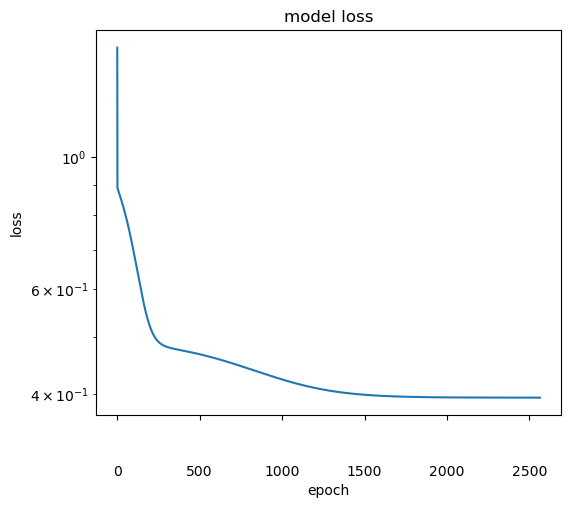

weight_matrix
[[-0.          0.11064652]
 [-0.          0.06447216]
 [ 1.29622686  1.127581  ]
 [ 1.11011183  1.6704632 ]
 [ 0.34430841  0.10955552]
 [ 0.19532467  0.22906177]
 [ 0.91873264  1.75429308]
 [ 1.0212034   1.90593588]
 [ 0.78664076 -0.        ]
 [-0.          0.06890485]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [ 0.01653432  0.06432065]
 [ 0.09358212  0.04736675]]
rms_1010_f =  0.22378867638759214
rms_1010_n =  0.10605525627200289
rms_1002_f =  0.06725408511954234
rms_1002_n =  0.2832867252074115
rms_1005_f =  0.0855036989743349
rms_1005_n =  0.18599770625081155
rms_1007_f =  0.08834629238127431
rms_1007_n =  0.08100983875646887
rms_0210_f =  0.2603494534171558
rms_0210_n =  0.08665357497772393
rms_0510_f =  0.2355941937997456
rms_0510_n =  0.05171997250811672
rms_0710_f =  0.1859265968382785
rms_0710_n =  0.1559814002596229
rms_total =  0.1498191050821487


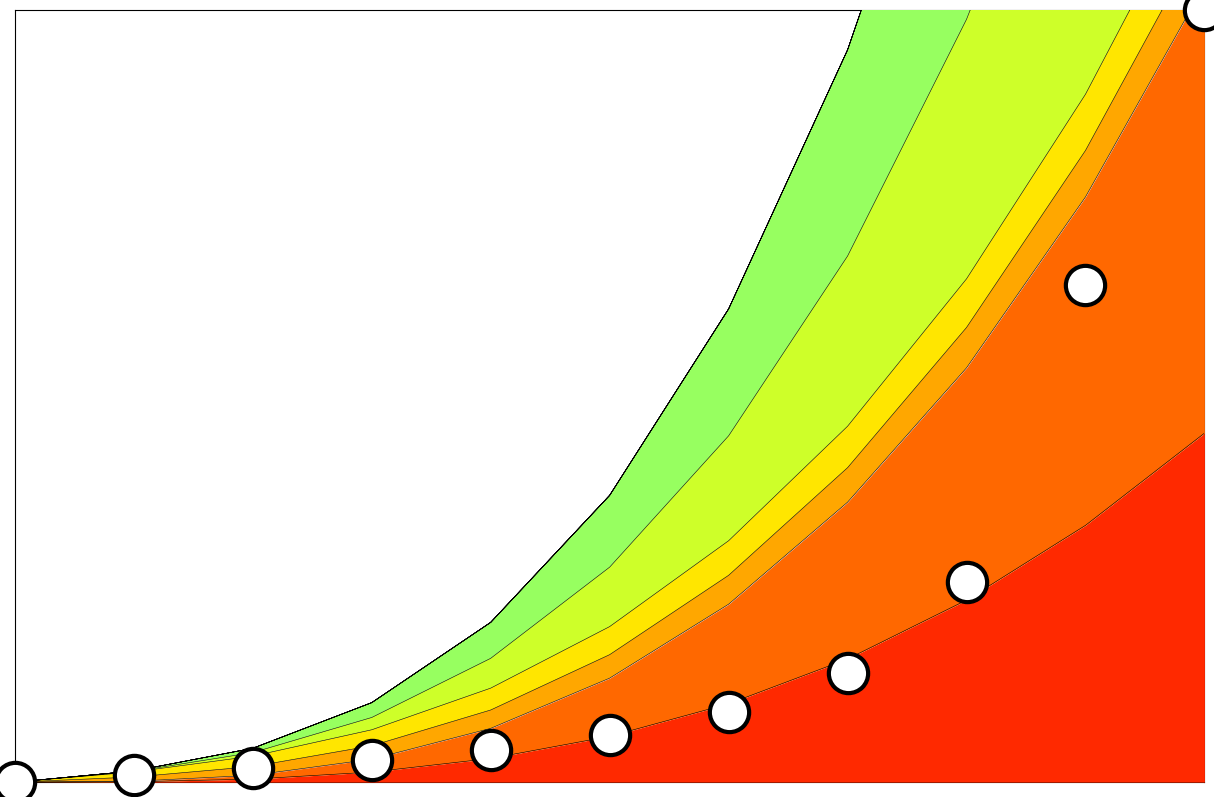

R2_1010_f =  -5.775176640226682


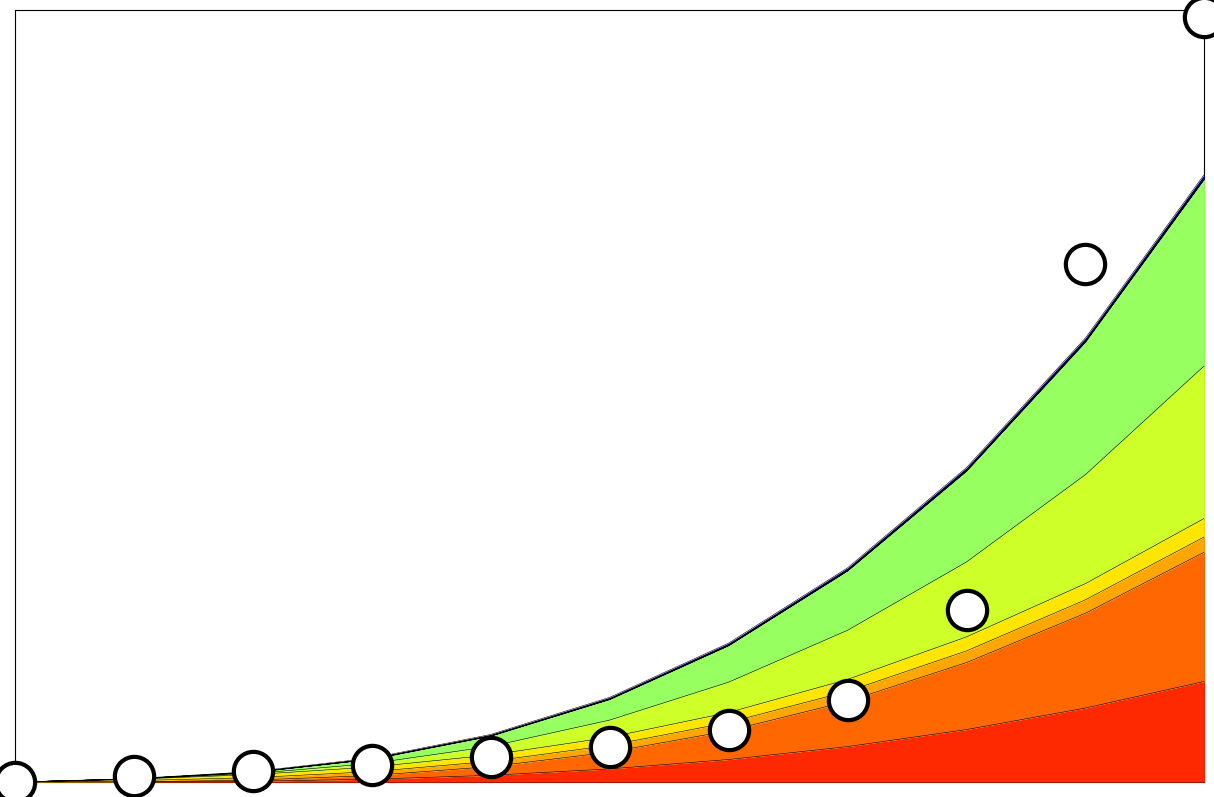

R2_1010_n =  0.8768834930887511


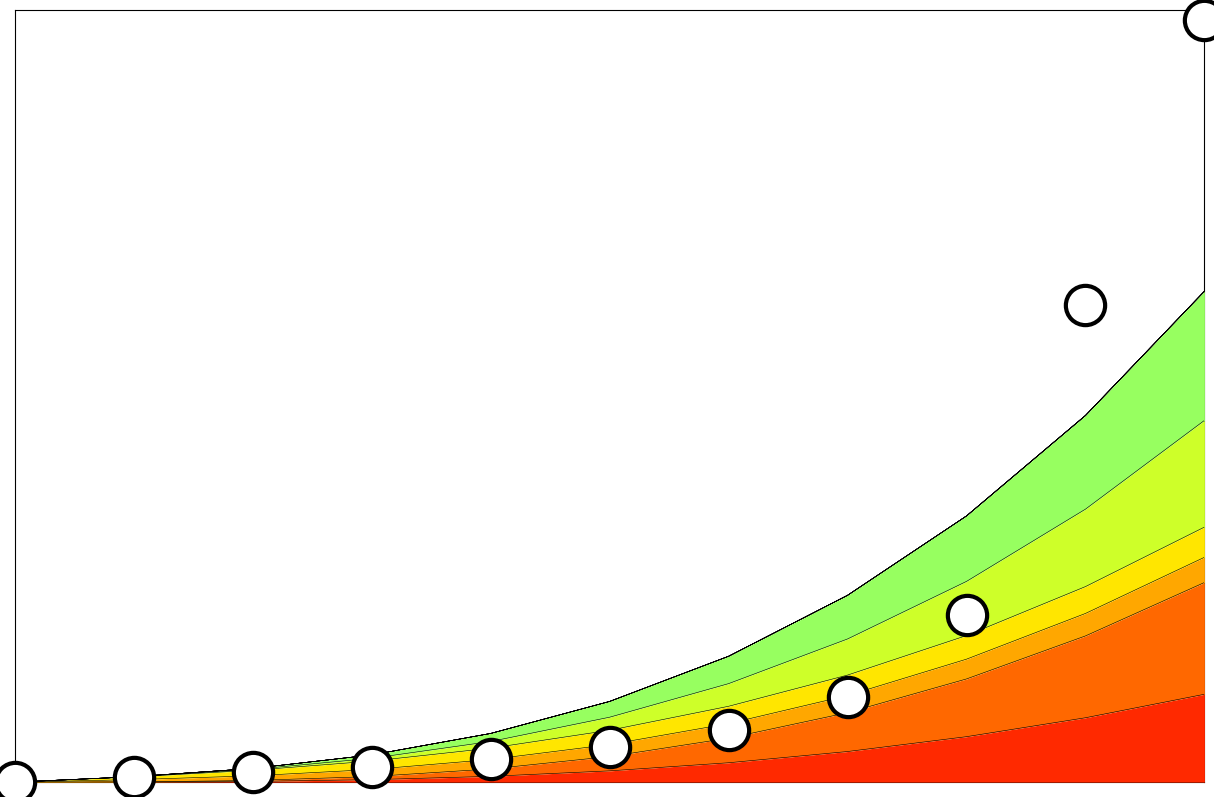

R2_1002_f =  0.8116935789629649


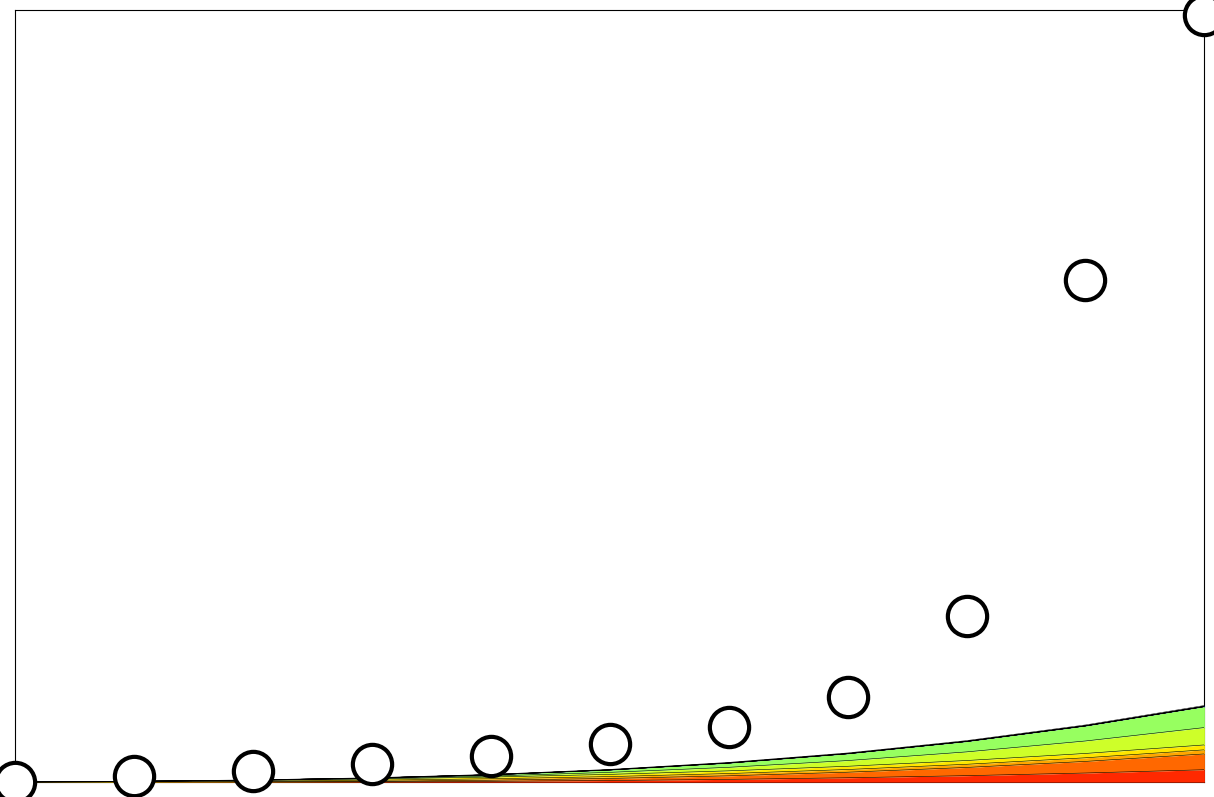

R2_1002_n =  -0.11173836775639567


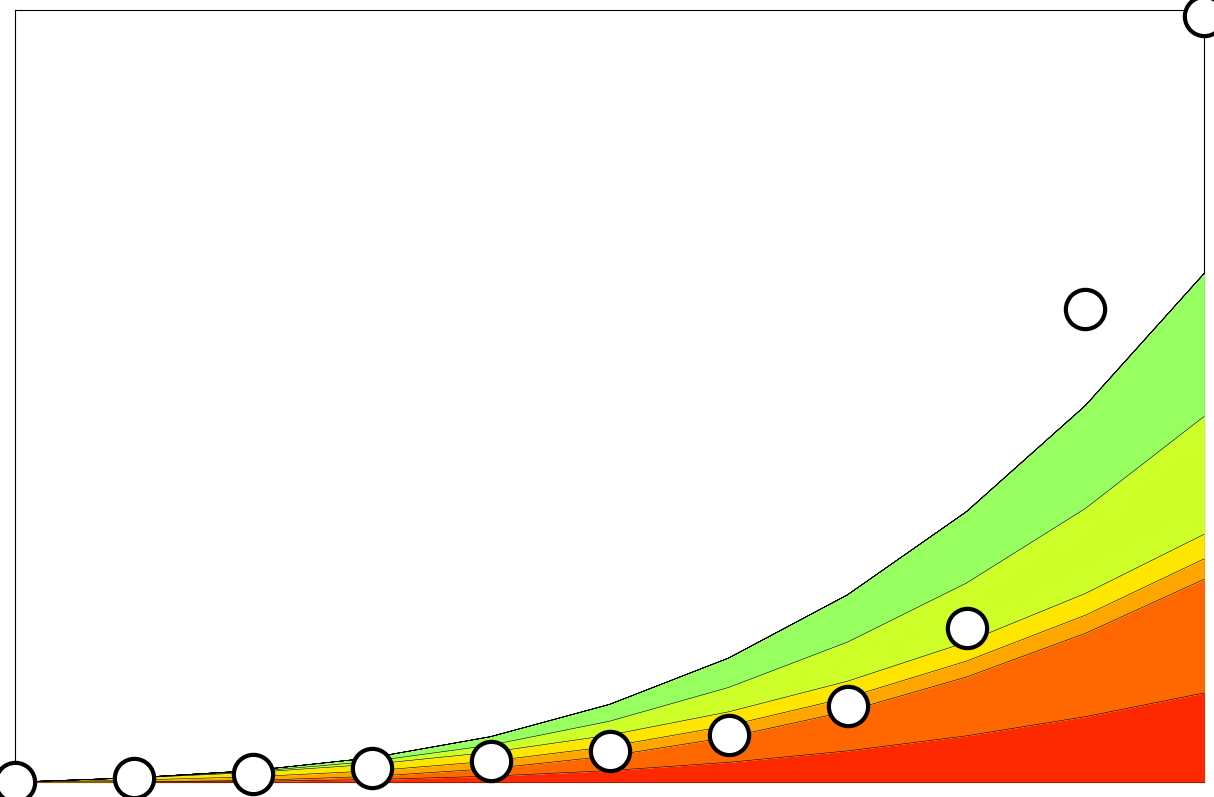

R2_1005_f =  0.8203105747631533


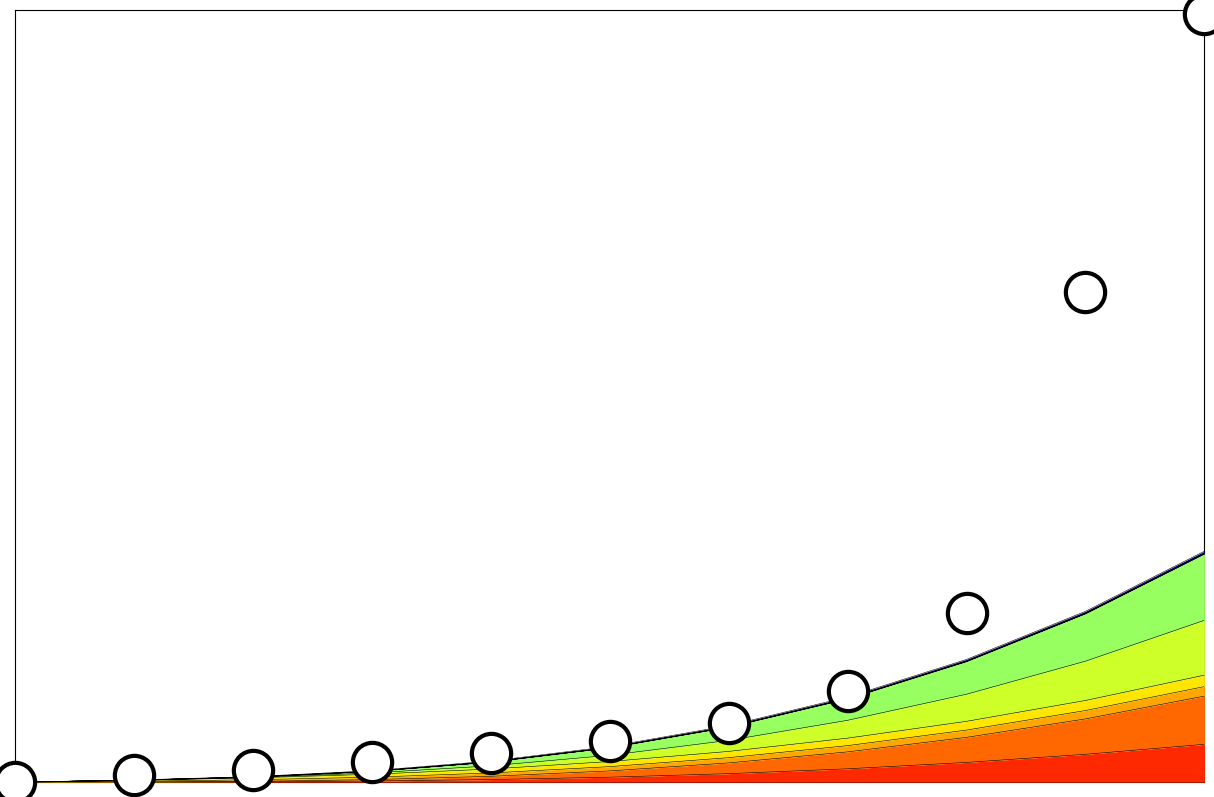

R2_1005_n =  0.36115518647770006


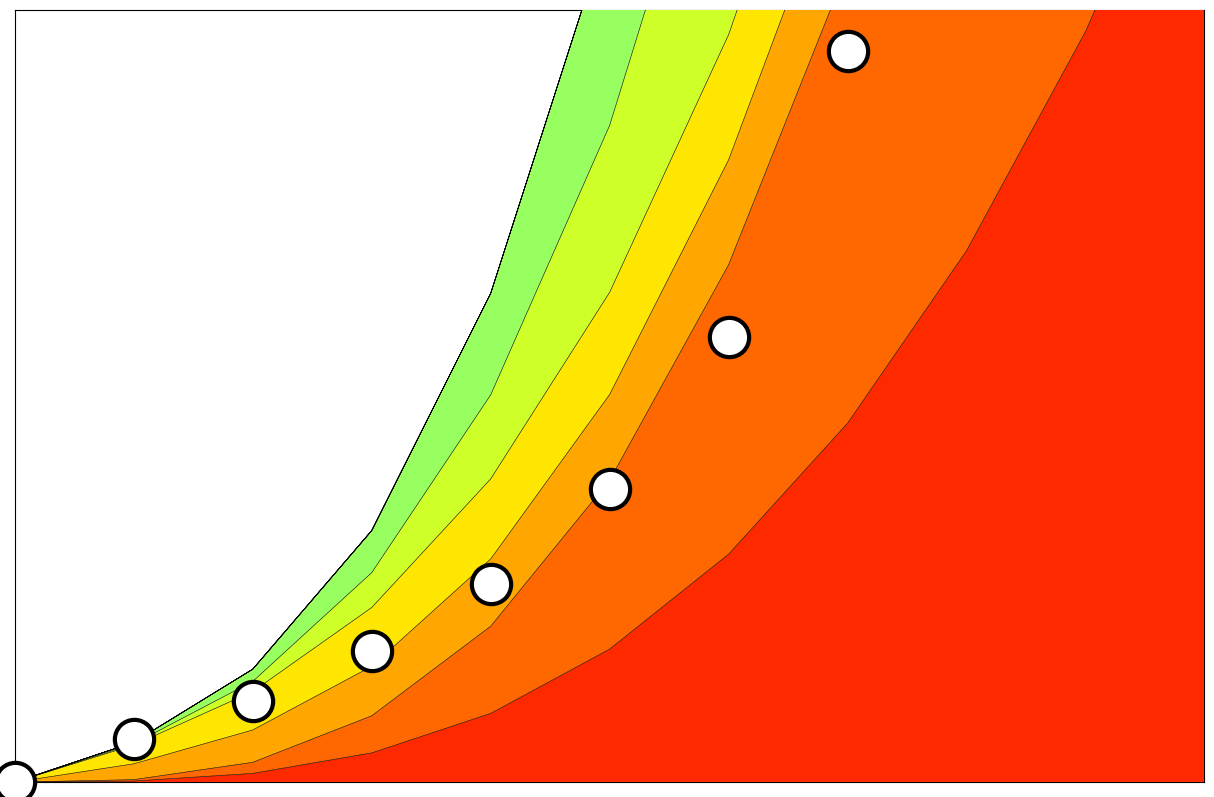

R2_1007_f =  0.8540086103235254


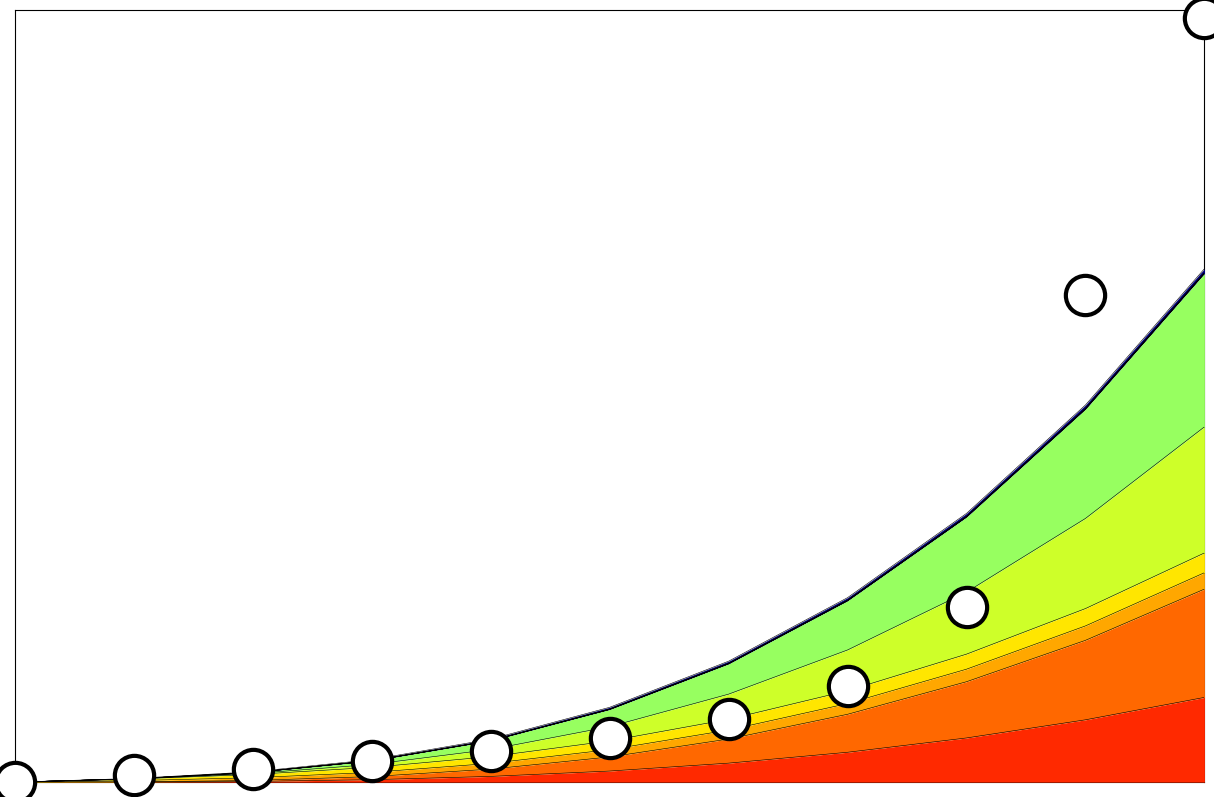

R2_1007_n =  0.8414270470677361


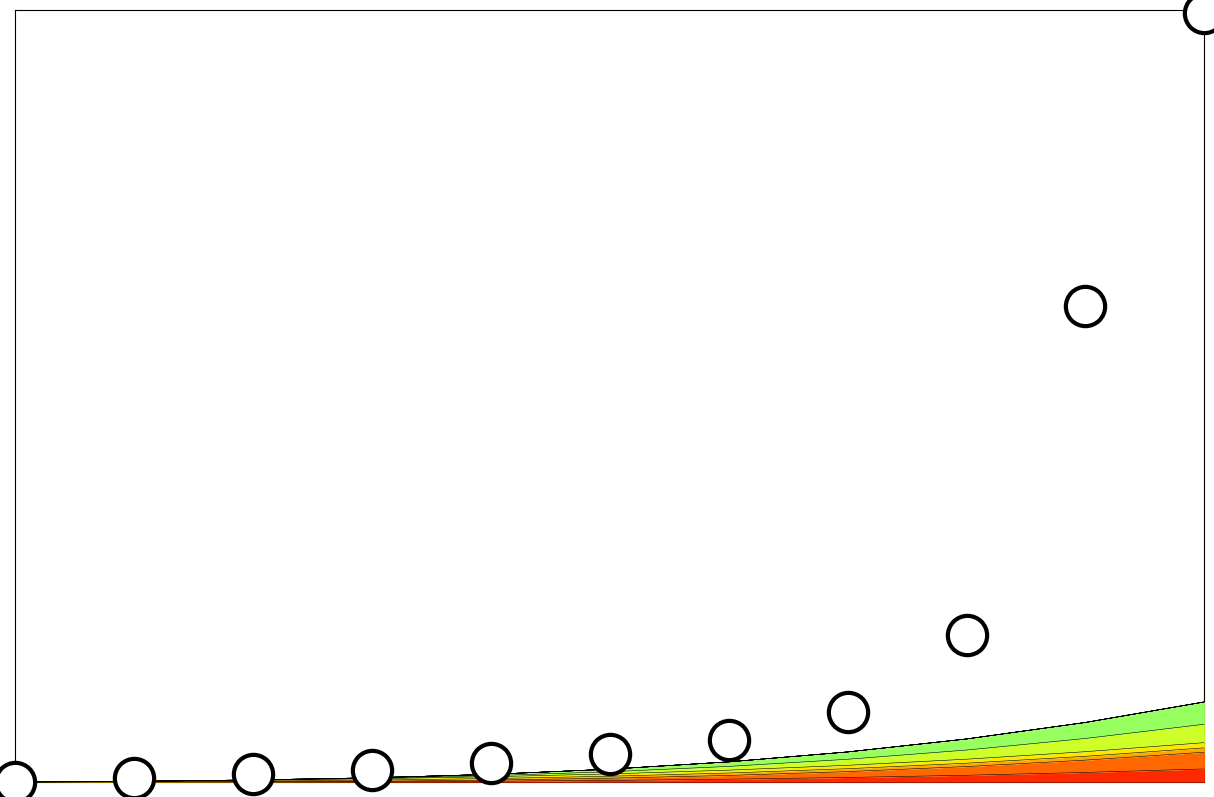

R2_0210_f =  -0.06273323999821523


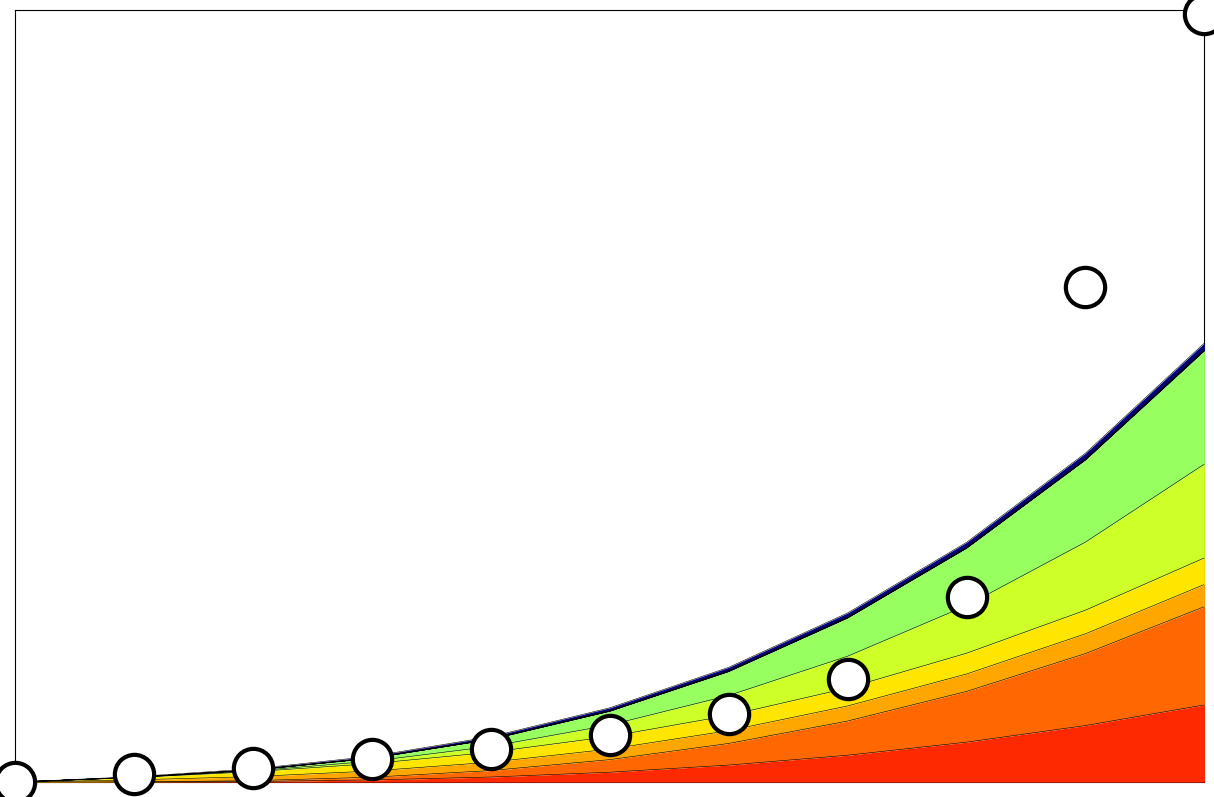

R2_0210_n =  0.7607534431540931


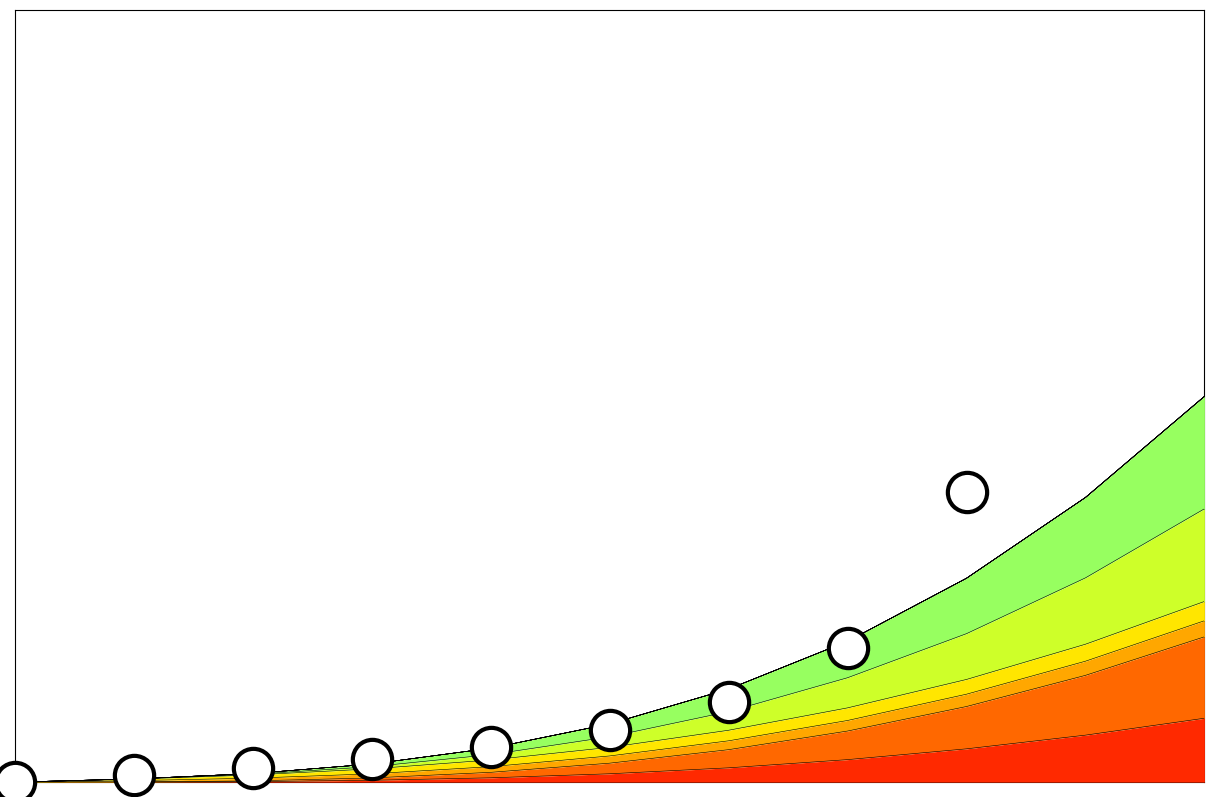

R2_0510_f =  0.2844723326762849


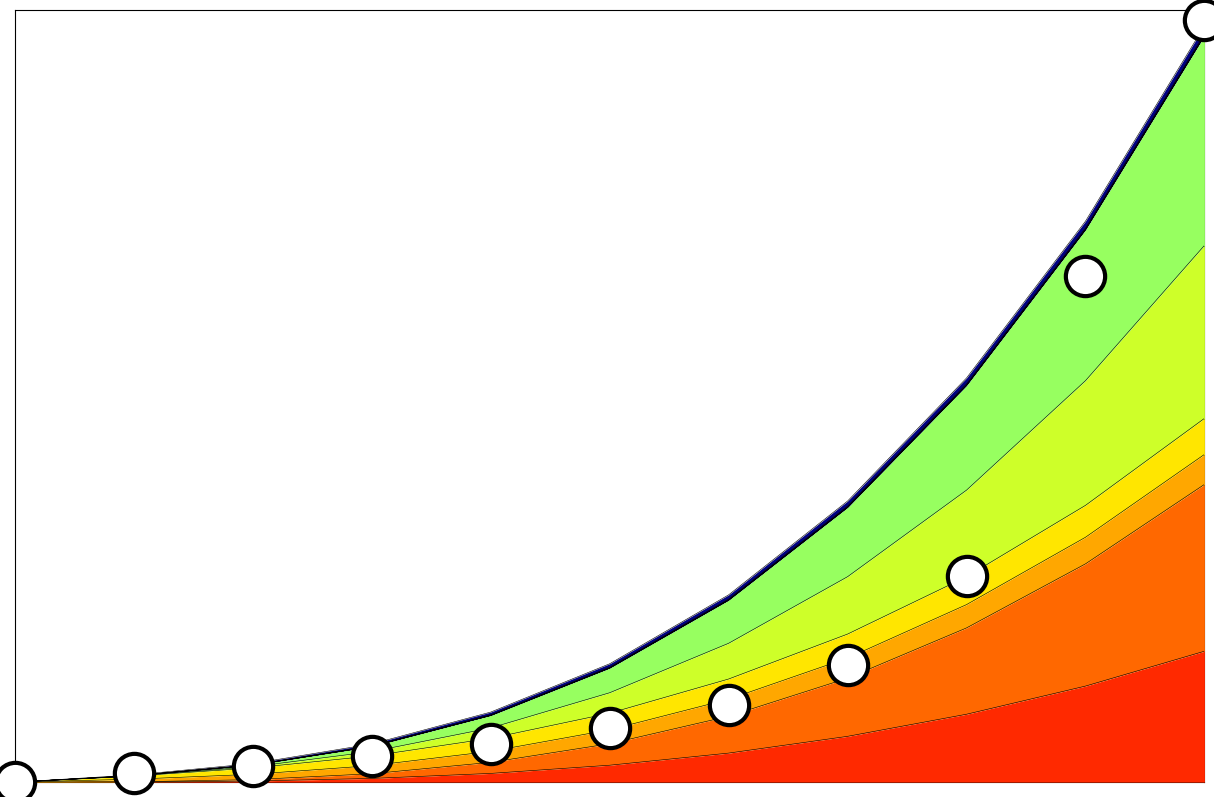

R2_0510_n =  0.8570537520085195


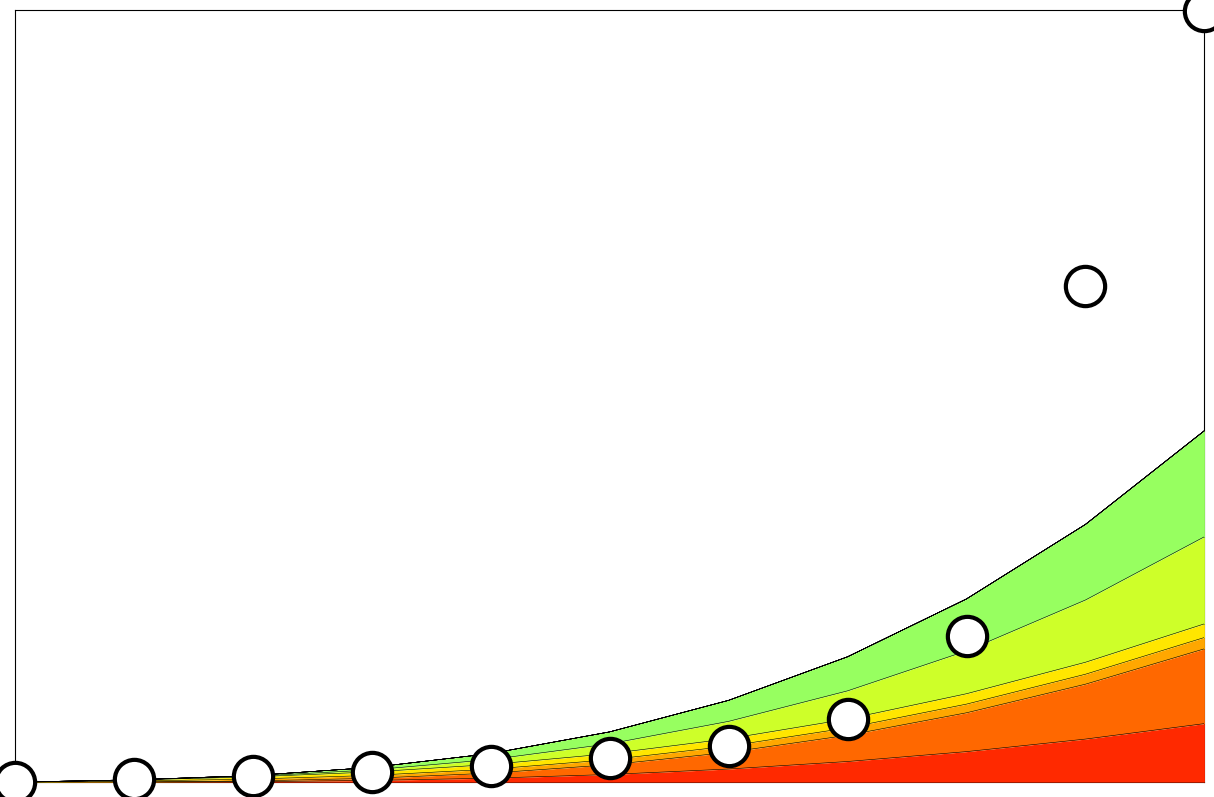

R2_0710_f =  0.6252262883893249


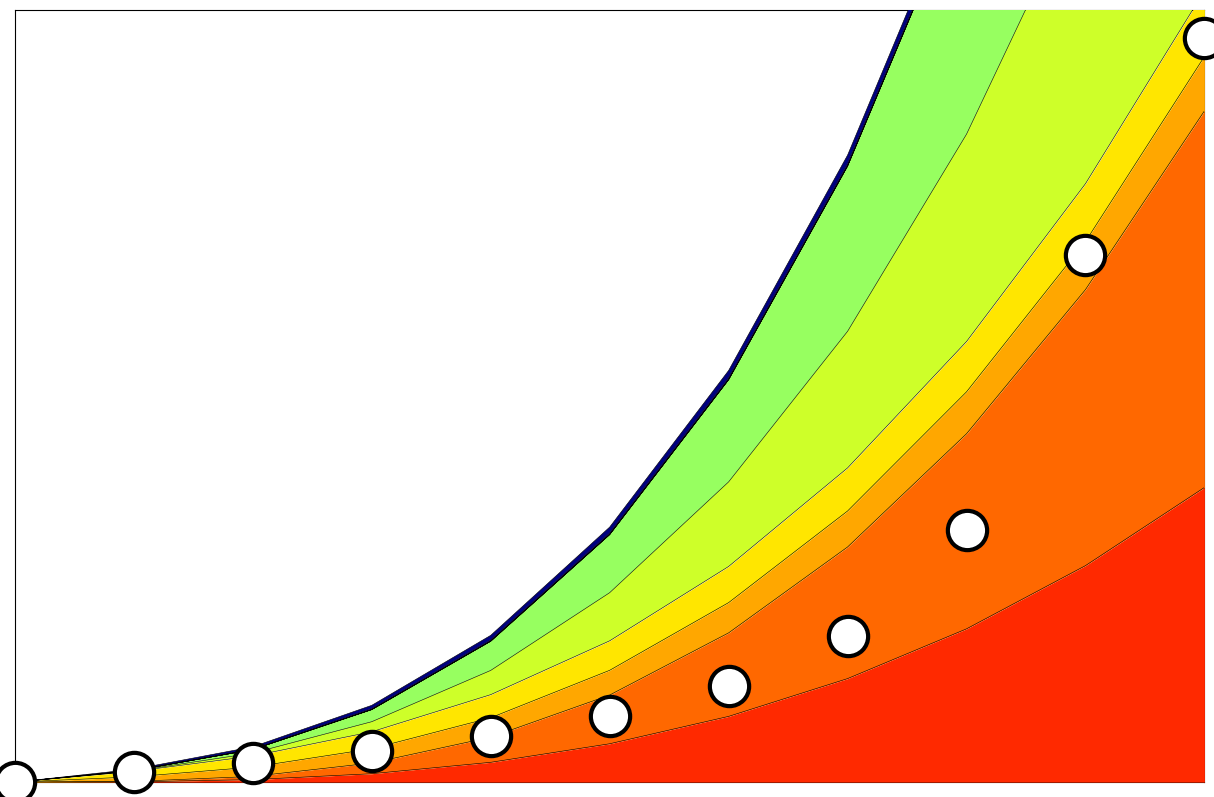

R2_0710_n =  -2.9902759175788067


In [ ]:
count = 1
for id1, Region in enumerate(Region_all):  # e.g. ['heart']
    for id2, modelFit_mode in enumerate(modelFit_mode_all):  # e.g. ['biaxial_shear_all']
        print(40 * '=')
        print("Comp {:d} / {:d}".format(count, len(Region_all) * len(modelFit_mode_all)))
        print(40 * '=')
        print("Region: ", Region, "| Fitting Mode: ", modelFit_mode)
        print(40 * '=')
        count += 1

        path2saveResults = os.path.join(path2saveResults_0, Region, modelFit_mode)
        path2saveResults_check = os.path.join(path2saveResults, 'Checkpoints')
        makeDIR(path2saveResults)
        makeDIR(path2saveResults_check)

        # ======================================
        # Load 7 Biaxial from getStressStrain
        (
            # 1) 1:1
            P_1010_f, stretch_1010_f,
            P_1010_n, stretch_1010_n,
            # 2) 1:0.25
            P_1002_f, stretch_1002_f,
            P_1002_n, stretch_1002_n,
            # 3) 1:0.5
            P_1005_f, stretch_1005_f,
            P_1005_n, stretch_1005_n,
            # 4) 1:0.75
            P_1007_f, stretch_1007_f,
            P_1007_n, stretch_1007_n,
            # 5) 0.25:1
            P_0210_f, stretch_0210_f,
            P_0210_n, stretch_0210_n,
            # 6) 0.5:1
            P_0510_f, stretch_0510_f,
            P_0510_n, stretch_0510_n,
            # 7) 0.75:1
            P_0710_f, stretch_0710_f,
            P_0710_n, stretch_0710_n
        ) = getStressStrain(Region_test)

        # =========== Build model + architecture ===========
        if model_type == 'Invariant':
            Psi_model, terms = StrainEnergyCANN_invariant(reg, pen)
        elif model_type == 'Stretch':
            Psi_model, terms = StrainEnergyCANN_stretch(reg, pen)

        (
            model_bi, model_bi_2, model_bi_3, model_bi_4, model_bi_5, model_bi_6, model_bi_7,
            model_bi_all, Psi_model
        ) = modelArchitecture(Psi_model)

        # Summarize model
        with open(Model_summary, 'w') as fh:
            Psi_model.summary(line_length=80, print_fn=lambda x: fh.write(x + '\n'))

        # Prepare data for training
        model_given, input_train, output_train, sample_weights = traindata(modelFit_mode)

        # Paths
        Save_path = path2saveResults + '/model.h5'
        Save_weights = path2saveResults + '/weights'
        path_checkpoint = os.path.join(path2saveResults_check, 'best_weights')

        # =============== Train or Load ===============
        if train:
            model_given, history = Compile_and_fit(
                model_given, input_train, output_train,
                epochs, path_checkpoint, sample_weights
            )
            model_given.load_weights(path_checkpoint, by_name=False, skip_mismatch=False)
            tf.keras.models.save_model(Psi_model, Save_path, overwrite=True)
            Psi_model.save_weights(Save_weights, overwrite=True)

            # Plot training loss
            loss_history = history.history['loss']
            fig, axe = plt.subplots(figsize=[6, 5])
            plotLoss(axe, loss_history)
            plt.savefig(path2saveResults + '/Plot_loss_' + Region + '_' + modelFit_mode + '.pdf')
            plt.show()
        else:
            Psi_model.load_weights(Save_weights, by_name=False, skip_mismatch=False)


        # ============== Predict Biaxial (7) ==============
        # 1) 1:1
        Stress_predict_1010 = model_bi.predict([stretch_1010_f, stretch_1010_n], verbose=0)
        Stress_predict_1010_f = Stress_predict_1010[0][:]
        Stress_predict_1010_n = Stress_predict_1010[1][:]

        # 2) 1:0.25
        Stress_predict_1002 = model_bi_2.predict([stretch_1002_f, stretch_1002_n], verbose=0)
        Stress_predict_1002_f = Stress_predict_1002[0][:]
        Stress_predict_1002_n = Stress_predict_1002[1][:]

        # 3) 1:0.5
        Stress_predict_1005 = model_bi_3.predict([stretch_1005_f, stretch_1005_n], verbose=0)
        Stress_predict_1005_f = Stress_predict_1005[0][:]
        Stress_predict_1005_n = Stress_predict_1005[1][:]

        # 4) 1:0.75
        Stress_predict_1007 = model_bi_4.predict([stretch_1007_f, stretch_1007_n], verbose=0)
        Stress_predict_1007_f = Stress_predict_1007[0][:]
        Stress_predict_1007_n = Stress_predict_1007[1][:]

        # 5) 0.25:1
        Stress_predict_0210 = model_bi_5.predict([stretch_0210_f, stretch_0210_n], verbose=0)
        Stress_predict_0210_f = Stress_predict_0210[0][:]
        Stress_predict_0210_n = Stress_predict_0210[1][:]

        # 6) 0.5:1
        Stress_predict_0510 = model_bi_6.predict([stretch_0510_f, stretch_0510_n], verbose=0)
        Stress_predict_0510_f = Stress_predict_0510[0][:]
        Stress_predict_0510_n = Stress_predict_0510[1][:]

        # 7) 0.75:1
        Stress_predict_0710 = model_bi_7.predict([stretch_0710_f, stretch_0710_n], verbose=0)
        Stress_predict_0710_f = Stress_predict_0710[0][:]
        Stress_predict_0710_n = Stress_predict_0710[1][:]

        # ============== Show Weights ==============
        if model_type == 'Stretch':
            weight_matrix = np.empty((terms, 1))
            for i in range(terms):
                weight_matrix[i] = Psi_model.get_weights()[i]
            print("weight_matrix")
            print(*weight_matrix, sep="\n")
        else:
            weight_matrix = np.empty((terms, 2))
            for i in range(terms):
                value = Psi_model.get_weights()[i][0][0]
                weight_matrix[i, 0] = value
            weight_matrix[:, 1] = Psi_model.get_layer('wx2').get_weights()[0].flatten()
            print("weight_matrix")
            print(weight_matrix)

        model_weights_0 = Psi_model.get_weights()



        # ================== Compute RMSE for 7 biaxial ==================
        # 1) 1:1
        rms_1010_f = np.sqrt(mean_squared_error(P_1010_f, Stress_predict_1010_f))
        print('rms_1010_f = ', rms_1010_f)
        rms_1010_n = np.sqrt(mean_squared_error(P_1010_n, Stress_predict_1010_n))
        print('rms_1010_n = ', rms_1010_n)

        # 2) 1:0.25
        rms_1002_f = np.sqrt(mean_squared_error(P_1002_f, Stress_predict_1002_f))
        print('rms_1002_f = ', rms_1002_f)
        rms_1002_n = np.sqrt(mean_squared_error(P_1002_n, Stress_predict_1002_n))
        print('rms_1002_n = ', rms_1002_n)

        # 3) 1:0.5
        rms_1005_f = np.sqrt(mean_squared_error(P_1005_f, Stress_predict_1005_f))
        print('rms_1005_f = ', rms_1005_f)
        rms_1005_n = np.sqrt(mean_squared_error(P_1005_n, Stress_predict_1005_n))
        print('rms_1005_n = ', rms_1005_n)

        # 4) 1:0.75
        rms_1007_f = np.sqrt(mean_squared_error(P_1007_f, Stress_predict_1007_f))
        print('rms_1007_f = ', rms_1007_f)
        rms_1007_n = np.sqrt(mean_squared_error(P_1007_n, Stress_predict_1007_n))
        print('rms_1007_n = ', rms_1007_n)

        # 5) 0.25:1
        rms_0210_f = np.sqrt(mean_squared_error(P_0210_f, Stress_predict_0210_f))
        print('rms_0210_f = ', rms_0210_f)
        rms_0210_n = np.sqrt(mean_squared_error(P_0210_n, Stress_predict_0210_n))
        print('rms_0210_n = ', rms_0210_n)

        # 6) 0.5:1
        rms_0510_f = np.sqrt(mean_squared_error(P_0510_f, Stress_predict_0510_f))
        print('rms_0510_f = ', rms_0510_f)
        rms_0510_n = np.sqrt(mean_squared_error(P_0510_n, Stress_predict_0510_n))
        print('rms_0510_n = ', rms_0510_n)

        # 7) 0.75:1
        rms_0710_f = np.sqrt(mean_squared_error(P_0710_f, Stress_predict_0710_f))
        print('rms_0710_f = ', rms_0710_f)
        rms_0710_n = np.sqrt(mean_squared_error(P_0710_n, Stress_predict_0710_n))
        print('rms_0710_n = ', rms_0710_n)



        # Summation 7 biaxial × 2 directions = 14 total
        rms_total = (
              rms_1010_f + rms_1010_n
            + rms_1002_f + rms_1002_n
            + rms_1005_f + rms_1005_n
            + rms_1007_f + rms_1007_n
            + rms_0210_f + rms_0210_n
            + rms_0510_f + rms_0510_n
            + rms_0710_f + rms_0710_n
        ) / 14.0
        print('rms_total = ', rms_total)


        # ========== PLOT Biaxial (7) in fiber (x) & normal (y) directions ==========
        # 1) 1:1
        fig_1010x, ax_1010x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1010x, Psi_model, model_weights_0, model_bi, terms,
                  stretch_1010_f, stretch_1010_n, stretch_1010_f, P_1010_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '1010x')
        R2_1010_f = r2_score(P_1010_f, Stress_predict_1010_f)
        print('R2_1010_f = ', R2_1010_f)

        fig_1010y, ax_1010y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1010y, Psi_model, model_weights_0, model_bi, terms,
                  stretch_1010_f, stretch_1010_n, stretch_1010_n, P_1010_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '1010y')
        R2_1010_n = r2_score(P_1010_n, Stress_predict_1010_n)
        print('R2_1010_n = ', R2_1010_n)

        # 2) 1:0.25
        fig_1002x, ax_1002x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1002x, Psi_model, model_weights_0, model_bi_6, terms,
                  stretch_1002_f, stretch_1002_n, stretch_1002_f, P_1002_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '1002x')
        R2_1002_f = r2_score(P_1002_f, Stress_predict_1002_f)
        print('R2_1002_f = ', R2_1002_f)

        fig_1002y, ax_1002y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1002y, Psi_model, model_weights_0, model_bi_6, terms,
                  stretch_1002_f, stretch_1002_n, stretch_1002_n, P_1002_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '1002y')
        R2_1002_n = r2_score(P_1002_n, Stress_predict_1002_n)
        print('R2_1002_n = ', R2_1002_n)

        # 3) 1:0.5
        fig_1005x, ax_1005x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1005x, Psi_model, model_weights_0, model_bi_2, terms,
                  stretch_1005_f, stretch_1005_n, stretch_1005_f, P_1005_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '1005x')
        R2_1005_f = r2_score(P_1005_f, Stress_predict_1005_f)
        print('R2_1005_f = ', R2_1005_f)

        fig_1005y, ax_1005y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1005y, Psi_model, model_weights_0, model_bi_2, terms,
                  stretch_1005_f, stretch_1005_n, stretch_1005_n, P_1005_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '1005y')
        R2_1005_n = r2_score(P_1005_n, Stress_predict_1005_n)
        print('R2_1005_n = ', R2_1005_n)

        # 4) 1:0.75
        fig_1007x, ax_1007x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1007x, Psi_model, model_weights_0, model_bi_3, terms,
                  stretch_1007_f, stretch_1007_n, stretch_1007_f, P_1007_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '1007x')
        R2_1007_f = r2_score(P_1007_f, Stress_predict_1007_f)
        print('R2_1007_f = ', R2_1007_f)

        fig_1007y, ax_1007y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_1007y, Psi_model, model_weights_0, model_bi_3, terms,
                  stretch_1007_f, stretch_1007_n, stretch_1007_n, P_1007_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '1007y')
        R2_1007_n = r2_score(P_1007_n, Stress_predict_1007_n)
        print('R2_1007_n = ', R2_1007_n)

        # 5) 0.25:1
        fig_0210x, ax_0210x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0210x, Psi_model, model_weights_0, model_bi_7, terms,
                  stretch_0210_f, stretch_0210_n, stretch_0210_f, P_0210_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '0210x')
        R2_0210_f = r2_score(P_0210_f, Stress_predict_0210_f)
        print('R2_0210_f = ', R2_0210_f)

        fig_0210y, ax_0210y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0210y, Psi_model, model_weights_0, model_bi_7, terms,
                  stretch_0210_f, stretch_0210_n, stretch_0210_n, P_0210_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '0210y')
        R2_0210_n = r2_score(P_0210_n, Stress_predict_0210_n)
        print('R2_0210_n = ', R2_0210_n)

        # 6) 0.5:1
        fig_0510x, ax_0510x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0510x, Psi_model, model_weights_0, model_bi_4, terms,
                  stretch_0510_f, stretch_0510_n, stretch_0510_f, P_0510_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '0510x')
        R2_0510_f = r2_score(P_0510_f, Stress_predict_0510_f)
        print('R2_0510_f = ', R2_0510_f)

        fig_0510y, ax_0510y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0510y, Psi_model, model_weights_0, model_bi_4, terms,
                  stretch_0510_f, stretch_0510_n, stretch_0510_n, P_0510_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '0510y')
        R2_0510_n = r2_score(P_0510_n, Stress_predict_0510_n)
        print('R2_0510_n = ', R2_0510_n)

        # 7) 0.75:1
        fig_0710x, ax_0710x = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0710x, Psi_model, model_weights_0, model_bi_5, terms,
                  stretch_0710_f, stretch_0710_n, stretch_0710_f, P_0710_f,
                  Region, path2saveResults, modelFit_mode, model_type, 'x', '0710x')
        R2_0710_f = r2_score(P_0710_f, Stress_predict_0710_f)
        print('R2_0710_f = ', R2_0710_f)

        fig_0710y, ax_0710y = plt.subplots(figsize=(12.5, 8.33))
        plotMapBi(ax_0710y, Psi_model, model_weights_0, model_bi_5, terms,
                  stretch_0710_f, stretch_0710_n, stretch_0710_n, P_0710_n,
                  Region, path2saveResults, modelFit_mode, model_type, 'y', '0710y')
        R2_0710_n = r2_score(P_0710_n, Stress_predict_0710_n)
        print('R2_0710_n = ', R2_0710_n)

        # ============ Save config to file =============
        Config = {
            "Region": Region,
            "modelFit_mode": modelFit_mode,
            "model_type": model_type,
            "Reg": reg,
            "Penalty": pen,
            "weights": weight_matrix.tolist()
        }
        json.dump(Config, open(os.path.join(path2saveResults, "Config_file.txt"), 'w'))
